# Crime Data Analysis

# Dataset : https://catalog.data.gov/dataset/crime-incidents-in-2024

In [45]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('D:\\College\\SEM_5\\BDA\\proj2\\Input\\Crime_Incidents_in_2024.csv')

# Check for missing values
df.isnull().sum()

# Drop or fill missing values
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])  # Example to drop rows with missing coordinates

# Convert date columns to datetime
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Convert categorical columns to appropriate types
df['SHIFT'] = df['SHIFT'].astype('category')
df['METHOD'] = df['METHOD'].astype('category')



In [46]:
# Get unique offenses
unique_offenses = df['OFFENSE'].unique()

# Print unique offenses
print(unique_offenses)

['THEFT F/AUTO' 'THEFT/OTHER' 'ROBBERY' 'MOTOR VEHICLE THEFT'
 'ASSAULT W/DANGEROUS WEAPON' 'BURGLARY' 'SEX ABUSE' 'HOMICIDE' 'ARSON']


In [47]:
# Filter the dataset for specific offenses
offenses_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']
df_filtered = df[df['OFFENSE'].isin(offenses_of_interest)]

# EDA

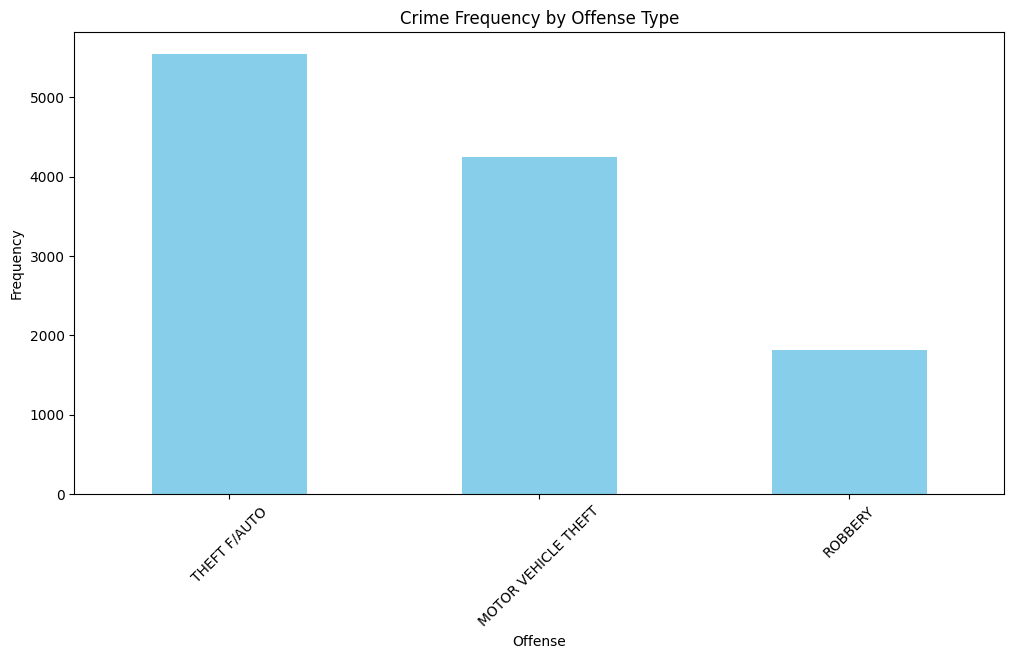

In [48]:
import matplotlib.pyplot as plt  # Add this import statement

# Count of crimes by offense type for the filtered data
crime_by_offense = df_filtered['OFFENSE'].value_counts()

# Plot the distribution
crime_by_offense.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Crime Frequency by Offense Type')
plt.xlabel('Offense')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_12384\1428449937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['REPORT_DAT'].dt.year
C:\Users\haris\AppData\Local\Temp\ipykernel_12384\1428449937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['REPORT_DAT'].dt.month


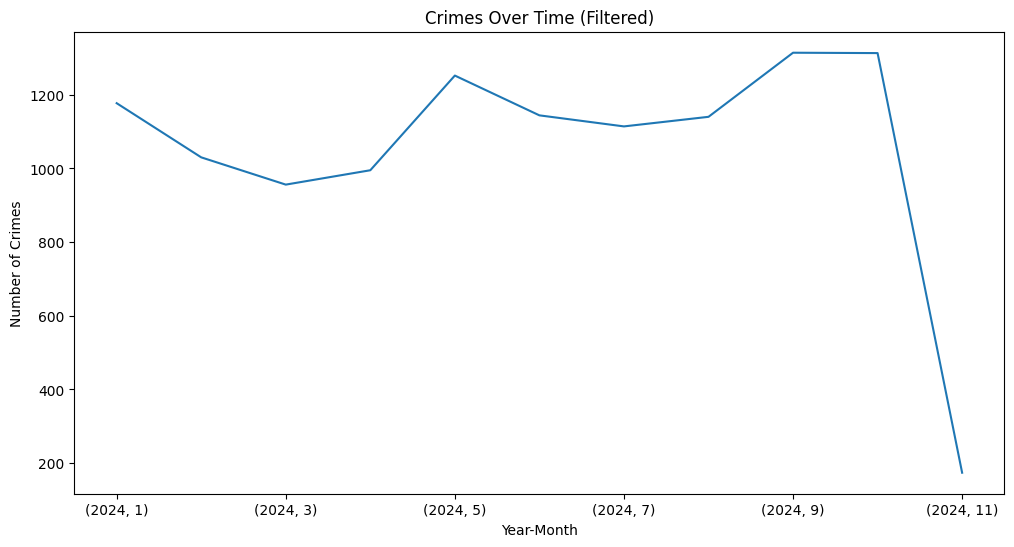

In [49]:
# Group crimes by year/month for the filtered dataset
df_filtered['year'] = df_filtered['REPORT_DAT'].dt.year
df_filtered['month'] = df_filtered['REPORT_DAT'].dt.month

crime_by_time = df_filtered.groupby(['year', 'month']).size()

# Plot the number of crimes per year/month
crime_by_time.plot(figsize=(12, 6))
plt.title('Crimes Over Time (Filtered)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.show()

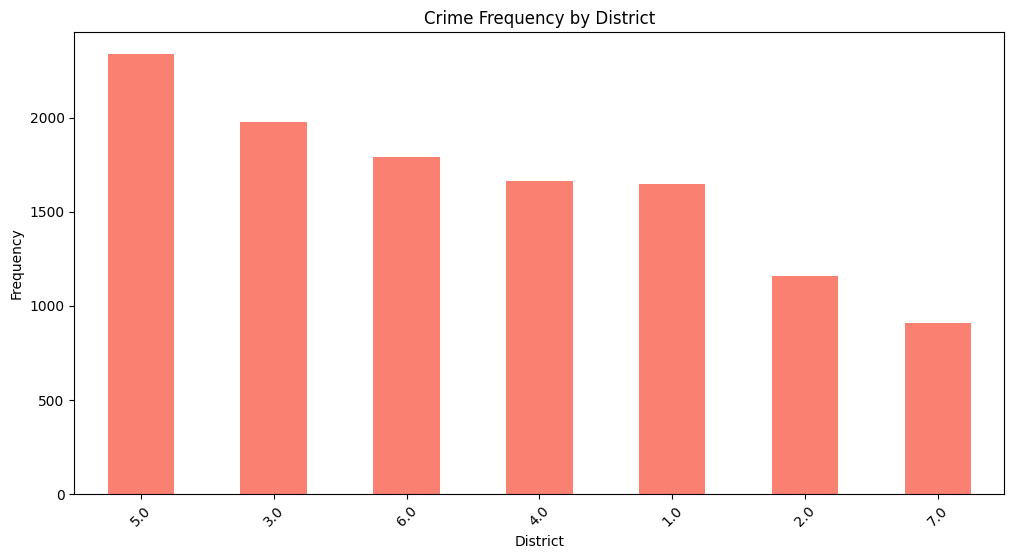

In [50]:
# Crimes by district for the filtered dataset
crime_by_district = df_filtered['DISTRICT'].value_counts()

# Plot the distribution of crimes by district
crime_by_district.plot(kind='bar', figsize=(12, 6), color='salmon')
plt.title('Crime Frequency by District')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


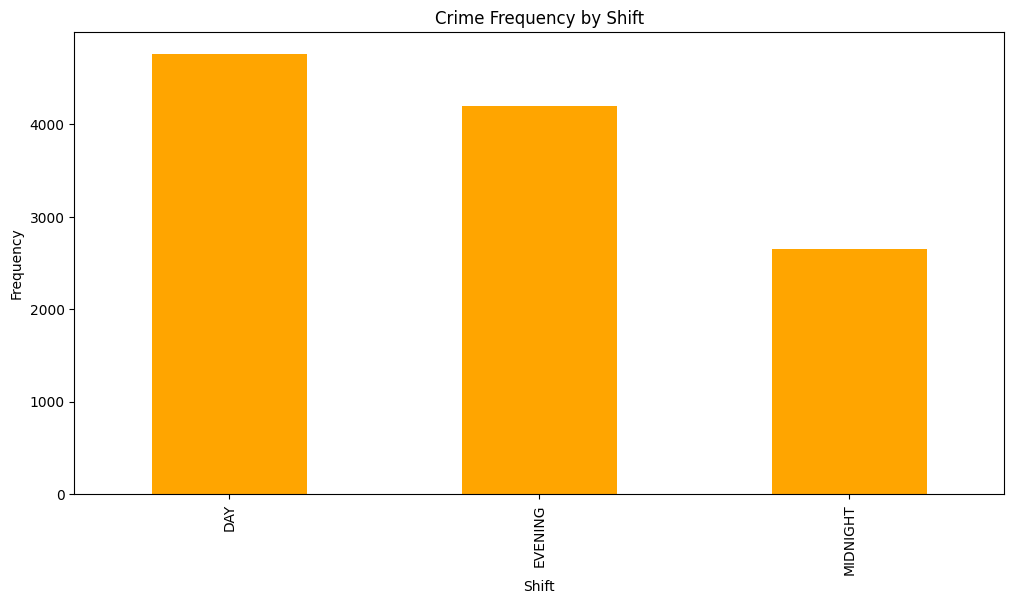

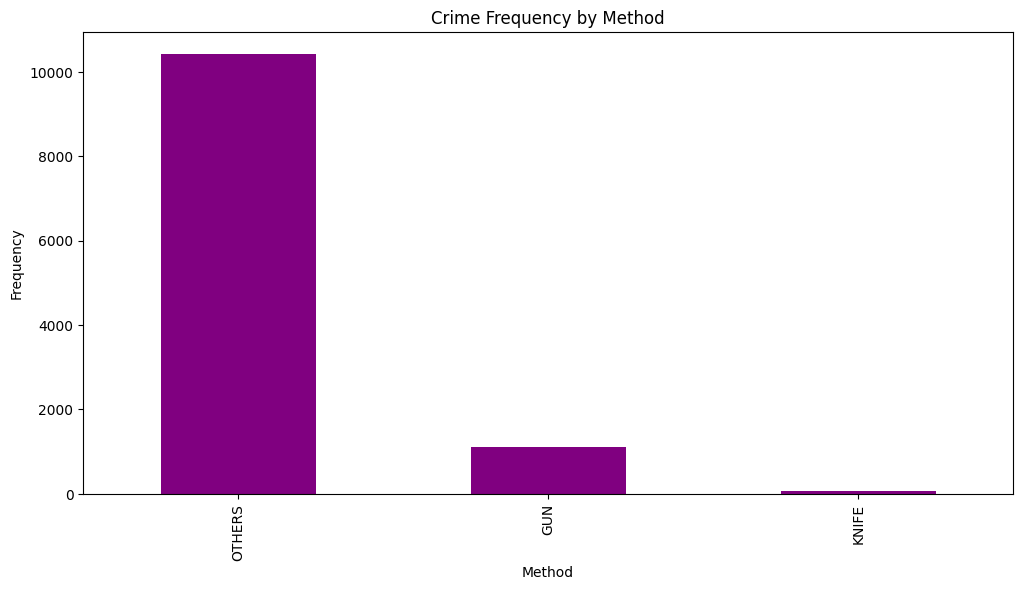

In [51]:
# Crimes by shift
crime_by_shift = df_filtered['SHIFT'].value_counts()

crime_by_shift.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Crime Frequency by Shift')
plt.xlabel('Shift')
plt.ylabel('Frequency')
plt.show()

# Crimes by method
crime_by_method = df_filtered['METHOD'].value_counts()

crime_by_method.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Crime Frequency by Method')
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.show()


C:\Users\haris\AppData\Local\Temp\ipykernel_12384\935332696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['REPORT_DAT'].dt.hour


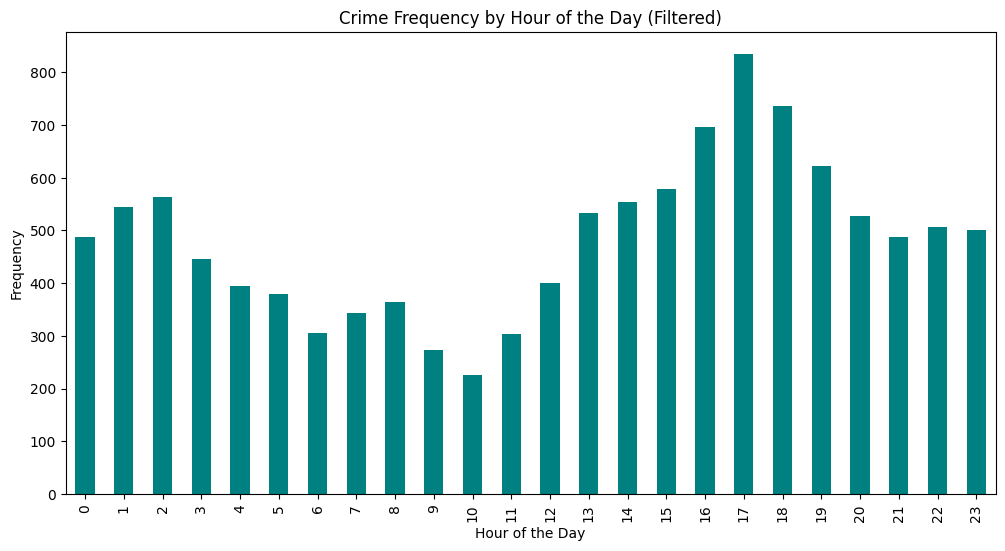

In [52]:
# Extract the hour of the crime report
df_filtered['hour'] = df_filtered['REPORT_DAT'].dt.hour

# Plot crimes by hour of the day
crime_by_hour = df_filtered['hour'].value_counts().sort_index()

crime_by_hour.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Crime Frequency by Hour of the Day (Filtered)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# SOM Analysis

In [53]:
# Filter the dataset for selected offenses
offenses_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']
df_filtered = df[df['OFFENSE'].isin(offenses_of_interest)]


In [54]:
# Select relevant features for SOM analysis (e.g., latitude and longitude)
df_som = df_filtered[['LATITUDE', 'LONGITUDE']].dropna()

# Normalize the data (SOM works better with normalized data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_som_scaled = scaler.fit_transform(df_som)


In [55]:
from minisom import MiniSom

# Initialize the SOM (let's use a 10x10 grid, but you can adjust the size)
som = MiniSom(x=10, y=10, input_len=df_som_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM with the data
som.train(df_som_scaled, 1000, verbose=True)  # 1000 iterations


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.147633036319079


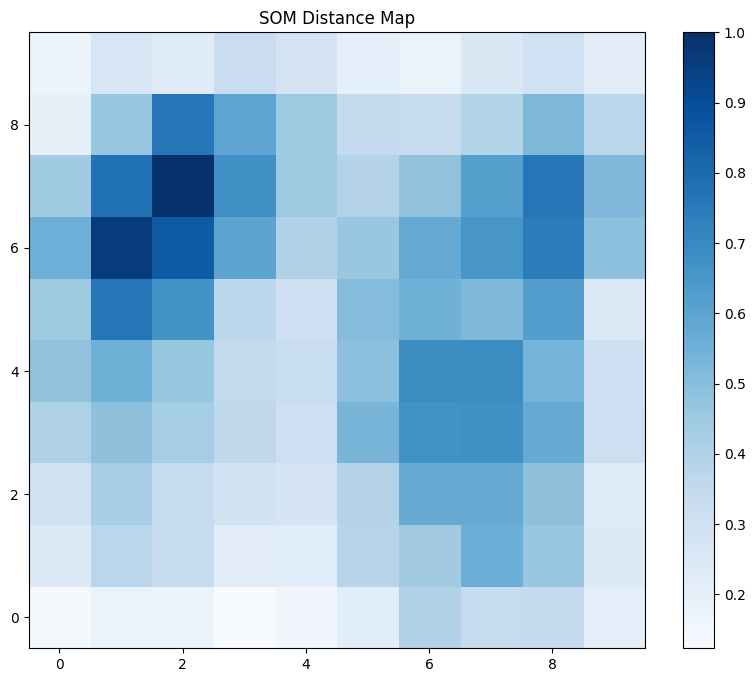

In [56]:
# Plot the SOM grid and the distance map (shows similarity between neurons)
import matplotlib.pyplot as plt

# Plot the distance map
plt.figure(figsize=(10, 8))
plt.title('SOM Distance Map')
plt.imshow(som.distance_map().T, cmap='Blues', origin='lower')
plt.colorbar()
plt.show()


In [57]:
# Get the winning node for each data point
winning_nodes = [som.winner(x) for x in df_som_scaled]

# Add the winning node info back to the dataframe
df_filtered['SOM_X'] = [node[0] for node in winning_nodes]
df_filtered['SOM_Y'] = [node[1] for node in winning_nodes]

# Now, you can plot or analyze the nodes


C:\Users\haris\AppData\Local\Temp\ipykernel_12384\585992350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SOM_X'] = [node[0] for node in winning_nodes]
C:\Users\haris\AppData\Local\Temp\ipykernel_12384\585992350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SOM_Y'] = [node[1] for node in winning_nodes]


In [58]:
# Get the winning node for each data point
winning_nodes = [som.winner(x) for x in df_som_scaled]

# Add the winning node info back to the dataframe
df_filtered['SOM_X'] = [node[0] for node in winning_nodes]
df_filtered['SOM_Y'] = [node[1] for node in winning_nodes]


C:\Users\haris\AppData\Local\Temp\ipykernel_12384\297357007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SOM_X'] = [node[0] for node in winning_nodes]
C:\Users\haris\AppData\Local\Temp\ipykernel_12384\297357007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SOM_Y'] = [node[1] for node in winning_nodes]


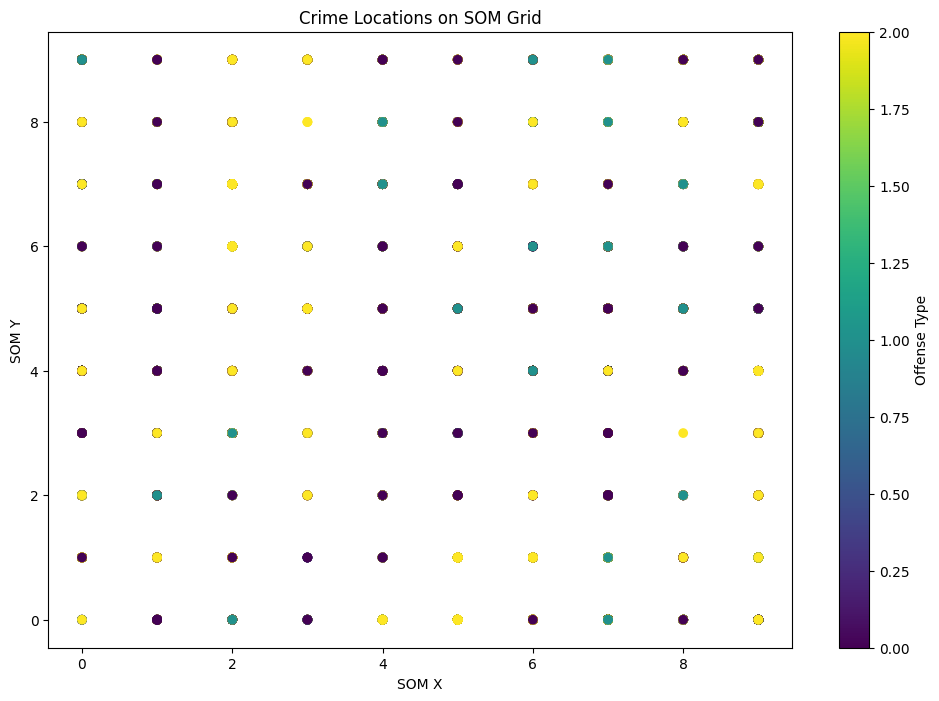

In [59]:
# Create a scatter plot of the SOM nodes
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['SOM_X'], df_filtered['SOM_Y'], c=df_filtered['OFFENSE'].astype('category').cat.codes, cmap='viridis', marker='o')
plt.title('Crime Locations on SOM Grid')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.colorbar(label='Offense Type')
plt.show()


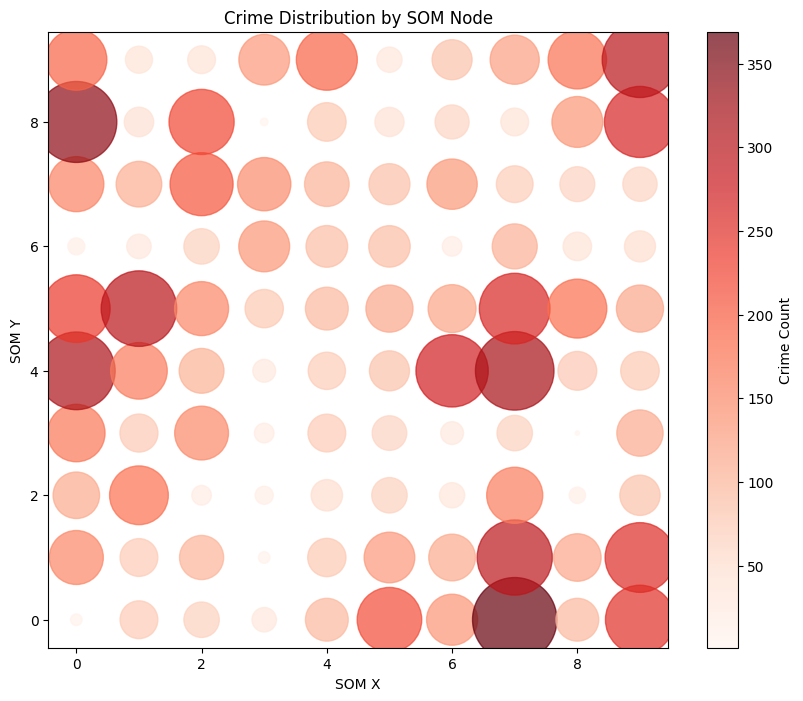

In [60]:
# Plot crime distribution per SOM node
crime_per_node = df_filtered.groupby(['SOM_X', 'SOM_Y']).size().reset_index(name='crime_count')

plt.figure(figsize=(10, 8))
plt.scatter(crime_per_node['SOM_X'], crime_per_node['SOM_Y'], s=crime_per_node['crime_count']*10, c=crime_per_node['crime_count'], cmap='Reds', alpha=0.7)
plt.title('Crime Distribution by SOM Node')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.colorbar(label='Crime Count')
plt.show()


In [61]:
# Quantization error
q_error = som.quantization_error(df_som_scaled) * 100
print(f"Quantization error: {q_error:.2f}%")

# Topographic error
t_error = som.topographic_error(df_som_scaled) * 100
print(f"Topographic error: {t_error:.2f}%")


Quantization error: 14.76%
Topographic error: 43.28%


# GeoSpatial Analysis

In [62]:
import geopandas as gpd

# Load the shapefile (adjust the path to your .shp file)
shapefile_path = 'D:\\College\\SEM_5\\BDA\\proj2\\Input\\Crime_Incidents_in_2024\\Crime_Incidents_in_2024.shp'  # Change the path as per your file
gdf = gpd.read_file(shapefile_path)

# Check the loaded shapefile data
gdf.head()


,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECOR,geometry
0,24078668,2024-05-25,DAY,OTHERS,THEFT F/AUTO,700 - 742 BLOCK OF DELAFIELD STREET NE,400312.440000,142393.190000,5,5A,...,009509,Precinct 66,38.949437,-76.996396,None,2024-05-25,2024-05-25,618324226,None,POINT (400312.44 142393.19)
1,24423683,2024-10-11,EVENING,OTHERS,THEFT/OTHER,4500 - 4599 BLOCK OF EADS PLACE NE,405525.054147,136452.080124,7,7F,...,007803,Precinct 98,38.895900,-76.936310,None,2024-09-24,2024-09-24,618324264,None,POINT (405525.054 136452.08)
2,24067641,2024-05-06,MIDNIGHT,GUN,ROBBERY,4400 - 4499 BLOCK OF TEXAS AVENUE SE,405106.864611,135146.159035,7,7F,...,007703,Precinct 103,38.884138,-76.941140,None,2024-05-06,2024-05-06,618324276,None,POINT (405106.865 135146.159)
3,24089539,2024-06-13,EVENING,OTHERS,THEFT/OTHER,1851 - 2008 BLOCK OF WISCONSIN AVENUE NW,394088.460000,138708.720000,2,2E,...,000102,Precinct 5,38.916226,-77.068165,None,2024-06-12,2024-06-12,618324311,None,POINT (394088.46 138708.72)
4,24160635,2024-10-17,EVENING,OTHERS,THEFT/OTHER,710 - 798 BLOCK OF ALABAMA AVENUE SE,400432.520000,130639.260000,8,8C,...,009804,Precinct 122,38.843553,-76.995018,None,2024-10-16,2024-10-16,618324322,None,POINT (400432.52 130639.26)


In [63]:
# Filter the crime data for specific offenses (e.g., 'THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT')
offenses_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']
df_filtered = df_filtered[df_filtered['OFFENSE'].isin(offenses_of_interest)]

# Convert the filtered dataframe to GeoDataFrame (latitude and longitude to geometry)
from shapely.geometry import Point

# Create Points from Latitude and Longitude
geometry = [Point(lon, lat) for lon, lat in zip(df_filtered['LONGITUDE'], df_filtered['LATITUDE'])]
df_geo = df_filtered.copy()
df_geo['geometry'] = geometry

# Convert to GeoDataFrame
gdf_crime = gpd.GeoDataFrame(df_geo, geometry='geometry')

# Set the same CRS (Coordinate Reference System) for both datasets (shapefile and crime data)
gdf_crime.set_crs(gdf.crs, allow_override=True, inplace=True)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,SOM_X,SOM_Y,geometry
0,400312.4400,142393.1900,24078668,2024-05-25 16:44:12+00:00,DAY,OTHERS,THEFT F/AUTO,700 - 742 BLOCK OF DELAFIELD STREET NE,400312.440000,142393.190000,...,38.949437,-76.996396,NaN,2024-05-25 01:00:00+00:00,2024-05-25 11:00:00+00:00,618324226,NaN,7,9,POINT (-76.996 38.949)
2,405106.8646,135146.1590,24067641,2024-05-06 06:29:53+00:00,MIDNIGHT,GUN,ROBBERY,4400 - 4499 BLOCK OF TEXAS AVENUE SE,405106.864611,135146.159035,...,38.884138,-76.941140,NaN,2024-05-06 02:15:00+00:00,2024-05-06 04:49:00+00:00,618324276,NaN,7,5,POINT (-76.941 38.884)
10,400212.8500,137949.3300,24169925,2024-11-01 19:24:33+00:00,EVENING,OTHERS,MOTOR VEHICLE THEFT,1300 - 1399 BLOCK OF 5TH STREET NE,400212.850000,137949.330000,...,38.909405,-76.997546,NaN,2024-11-01 18:24:00+00:00,2024-11-01 19:24:00+00:00,618324383,NaN,7,2,POINT (-76.998 38.909)
20,398058.2000,139487.7200,24072440,2024-05-14 22:29:27+00:00,EVENING,OTHERS,MOTOR VEHICLE THEFT,2400 - 2599 BLOCK OF GEORGIA AVENUE NW,398058.200000,139487.720000,...,38.923261,-77.022393,NaN,2024-05-14 20:38:00+00:00,2024-05-14 21:58:00+00:00,618324399,NaN,0,9,POINT (-77.022 38.923)
21,395153.4600,140064.8900,24073851,2024-05-17 13:01:42+00:00,DAY,OTHERS,THEFT F/AUTO,2700 - 2799 BLOCK OF CATHEDRAL AVENUE NW,395153.460000,140064.890000,...,38.928449,-77.055894,NaN,2024-05-16 19:30:00+00:00,2024-05-17 11:30:00+00:00,618324400,NaN,1,7,POINT (-77.056 38.928)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24522,399591.1305,130876.3491,24113678,2024-07-25 04:57:24+00:00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2922 - 2999 BLOCK OF 2ND STREET SE,399591.130526,130876.349111,...,38.845689,-77.004710,NaN,2024-07-24 16:15:00+00:00,2024-07-25 04:45:00+00:00,618881096,NaN,0,3,POINT (-77.005 38.846)
24525,398438.7000,141220.7900,24001731,2024-01-04 13:40:20+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF RANDOLPH STREET NW,398438.700000,141220.790000,...,38.938874,-77.018009,NaN,2024-01-04 12:57:00+00:00,2024-01-04 13:39:00+00:00,618881104,NaN,4,9,POINT (-77.018 38.939)
24526,399489.5200,137664.7500,24023815,2024-02-15 17:26:35+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,1222 - 1299 BLOCK OF 1ST STREET NE,399489.520000,137664.750000,...,38.906841,-77.005885,NOMA,2024-02-14 23:00:00+00:00,2024-02-15 16:00:00+00:00,618881133,NaN,4,4,POINT (-77.006 38.907)
24528,392390.8500,141700.3100,24117091,2024-07-31 13:06:34+00:00,DAY,OTHERS,THEFT F/AUTO,45TH STREET NW AND VAN NESS STREET NW,392390.850007,141700.310017,...,38.943162,-77.087773,NaN,2024-07-31 12:37:00+00:00,2024-07-31 13:05:00+00:00,618881135,NaN,2,7,POINT (-77.088 38.943)


In [64]:
import folium

# Create separate maps for each offense and save them
for offense in offenses_of_interest:
    # Create a map for each offense type
    m = folium.Map(location=[df_filtered['LATITUDE'].mean(), df_filtered['LONGITUDE'].mean()], zoom_start=12)
    
    # Filter crime data for the specific offense
    offense_data = df_geo[df_geo['OFFENSE'] == offense]
    
    # Add crime points for the specific offense
    for i in range(len(offense_data)):
        folium.CircleMarker(
            location=[offense_data.iloc[i]['LATITUDE'], offense_data.iloc[i]['LONGITUDE']],
            radius=5,
            color='red',  # Customize color for each offense
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            popup=offense_data.iloc[i]['OFFENSE']
        ).add_to(m)
    
    # Save the map for this offense type
    offense_map_path = f'{offense.replace("/", "_").replace(" ", "_")}_crime_map.html'
    m.save(offense_map_path)
    print(f"Saved map for offense '{offense}' as {offense_map_path}")


Saved map for offense 'THEFT F/AUTO' as THEFT_F_AUTO_crime_map.html
Saved map for offense 'ROBBERY' as ROBBERY_crime_map.html
Saved map for offense 'MOTOR VEHICLE THEFT' as MOTOR_VEHICLE_THEFT_crime_map.html


# Clustering Model - DBSCAN

In [65]:
import geopandas as gpd

shapefile = gpd.read_file('D:\\College\\SEM_5\\BDA\\proj2\\Input\\Crime_Incidents_in_2024\\Crime_Incidents_in_2024.shp')

# Display the first few rows of the shapefile
print(shapefile.head())


        CCN REPORT_DAT     SHIFT  METHOD       OFFENSE  \
0  24078668 2024-05-25       DAY  OTHERS  THEFT F/AUTO   
1  24423683 2024-10-11   EVENING  OTHERS   THEFT/OTHER   
2  24067641 2024-05-06  MIDNIGHT     GUN       ROBBERY   
3  24089539 2024-06-13   EVENING  OTHERS   THEFT/OTHER   
4  24160635 2024-10-17   EVENING  OTHERS   THEFT/OTHER   

                                      BLOCK         XBLOCK         YBLOCK  \
0    700 - 742 BLOCK OF DELAFIELD STREET NE  400312.440000  142393.190000   
1        4500 - 4599 BLOCK OF EADS PLACE NE  405525.054147  136452.080124   
2      4400 - 4499 BLOCK OF TEXAS AVENUE SE  405106.864611  135146.159035   
3  1851 - 2008 BLOCK OF WISCONSIN AVENUE NW  394088.460000  138708.720000   
4      710 - 798 BLOCK OF ALABAMA AVENUE SE  400432.520000  130639.260000   

  WARD ANC  ... CENSUS_TRA    VOTING_PRE   LATITUDE  LONGITUDE   BID  \
0    5  5A  ...     009509   Precinct 66  38.949437 -76.996396  None   
1    7  7F  ...     007803   Precinct 98  38

In [66]:
# Filter crime data for specific offenses (e.g., 'THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT')
offenses_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']
df_filtered = df[df['OFFENSE'].isin(offenses_of_interest)]

# Ensure that LATITUDE and LONGITUDE are in the correct format
df_filtered = df_filtered[['LATITUDE', 'LONGITUDE', 'OFFENSE']].dropna()

# Check if data is clean
print(df_filtered.head())


     LATITUDE  LONGITUDE              OFFENSE
0   38.949437 -76.996396         THEFT F/AUTO
2   38.884138 -76.941140              ROBBERY
10  38.909405 -76.997546  MOTOR VEHICLE THEFT
20  38.923261 -77.022393  MOTOR VEHICLE THEFT
21  38.928449 -77.055894         THEFT F/AUTO


In [67]:
import folium
from folium.plugins import HeatMap
import re

# Create a base map centered around the mean of the LATITUDE and LONGITUDE
def plot_heatmap_for_crime(crime_type, data):
    # Sanitize the crime_type to avoid invalid characters in the filename
    sanitized_crime_type = re.sub(r'[\\/*?:"<>|]', '_', crime_type)
    
    # Filter data for the current crime type
    crime_data = data[data['OFFENSE'] == crime_type]

    # Initialize the map centered around the average coordinates of the crime data
    crime_map = folium.Map(location=[crime_data['LATITUDE'].mean(), crime_data['LONGITUDE'].mean()], zoom_start=12)

    # Prepare the data for the heatmap
    heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in crime_data.iterrows()]

    # Add heatmap layer to the map
    HeatMap(heat_data).add_to(crime_map)

    # Save the map to an HTML file with the sanitized filename
    crime_map.save(f'{sanitized_crime_type}_heatmap.html')

# Loop over each offense and generate the heatmap
for offense in offenses_of_interest:
    plot_heatmap_for_crime(offense, df_filtered)


In [68]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the crime data (assuming it's in a DataFrame named 'df_filtered')
# Let's filter only the crime types you're interested in
offenses_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']
df_filtered = df[df['OFFENSE'].isin(offenses_of_interest)]

# Extract LATITUDE and LONGITUDE
coordinates = df_filtered[['LATITUDE', 'LONGITUDE']].dropna()

# Check the first few rows of the coordinates
print(coordinates.head())


     LATITUDE  LONGITUDE
0   38.949437 -76.996396
2   38.884138 -76.941140
10  38.909405 -76.997546
20  38.923261 -77.022393
21  38.928449 -77.055894


In [69]:
from sklearn.preprocessing import StandardScaler

# Standardize the coordinates to ensure the algorithm works properly
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Check the scaled coordinates
print(coordinates_scaled[:5])


[[ 1.34381305  0.15825972]
 [-0.75770871  1.7436494 ]
 [ 0.05546107  0.12525626]
 [ 0.50140018 -0.58764934]
 [ 0.66837089 -1.54887122]]


In [70]:
# DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=5)  # You can tune eps based on your dataset's distribution
clusters = db.fit_predict(coordinates_scaled)

# Add the cluster labels to the original DataFrame
df_filtered['Cluster'] = clusters

# Show the resulting clusters
print(df_filtered[['LATITUDE', 'LONGITUDE', 'Cluster']].head())


     LATITUDE  LONGITUDE  Cluster
0   38.949437 -76.996396       -1
2   38.884138 -76.941140        0
10  38.909405 -76.997546        1
20  38.923261 -77.022393        2
21  38.928449 -77.055894       -1


C:\Users\haris\AppData\Local\Temp\ipykernel_12384\2873512930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters


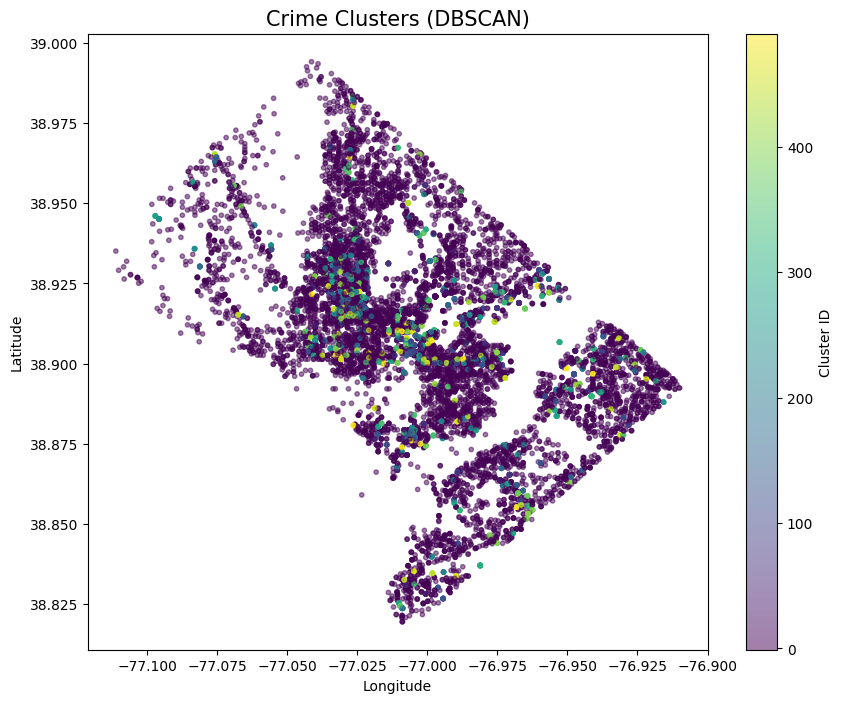

In [71]:
# Plotting the results
plt.figure(figsize=(10, 8))

# Plot all points with a scatter plot, colored by cluster
plt.scatter(df_filtered['LONGITUDE'], df_filtered['LATITUDE'], c=df_filtered['Cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Crime Clusters (DBSCAN)', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster ID')
plt.show()


In [72]:
# Save the dataframe with cluster labels to a CSV file
df_filtered.to_csv('crime_data_with_clusters.csv', index=False)


In [73]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
silhouette = silhouette_score(coordinates_scaled, df_filtered['Cluster']) * 100
print(f"Silhouette score: {silhouette:.2f}%")

# Davies-Bouldin index
db_index = davies_bouldin_score(coordinates_scaled, df_filtered['Cluster']) * 100
print(f"Davies-Bouldin index: {db_index:.2f}%")


Silhouette score: -26.60%
Davies-Bouldin index: 268.39%


# Machine Learning Algorithm - Random Forest

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the crime data (assuming 'df_filtered' is the crime data you have)
# Example columns: LATITUDE, LONGITUDE, OFFENSE, REPORT_DAT
df_filtered = df  # Replace with your actual DataFrame

# Convert 'REPORT_DAT' to datetime
df_filtered['REPORT_DAT'] = pd.to_datetime(df_filtered['REPORT_DAT'])

# Extract time-based features
df_filtered['hour'] = df_filtered['REPORT_DAT'].dt.hour
df_filtered['day_of_week'] = df_filtered['REPORT_DAT'].dt.dayofweek
df_filtered['month'] = df_filtered['REPORT_DAT'].dt.month
df_filtered['year'] = df_filtered['REPORT_DAT'].dt.year

# Assuming you're interested in predicting a crime type (binary classification example: 'ROBBERY' vs 'OTHER')
df_filtered['target'] = df_filtered['OFFENSE'].apply(lambda x: 1 if x == 'ROBBERY' else 0)

# Extract the relevant features: LATITUDE, LONGITUDE, hour, day_of_week, month, and year
X = df_filtered[['LATITUDE', 'LONGITUDE', 'hour', 'day_of_week', 'month', 'year']].dropna()
y = df_filtered['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.head())


        LATITUDE  LONGITUDE  hour  day_of_week  month  year
9999   38.864898 -76.982299     7            5      6  2024
11212  38.906445 -77.023978     8            5      6  2024
6015   38.908566 -77.010675     3            0      4  2024
16879  38.915803 -76.980924     7            5      6  2024
6647   38.892471 -76.915039    22            2     10  2024


In [75]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9308517864420595
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6856
           1       0.44      0.03      0.05       505

    accuracy                           0.93      7361
   macro avg       0.69      0.51      0.51      7361
weighted avg       0.90      0.93      0.90      7361



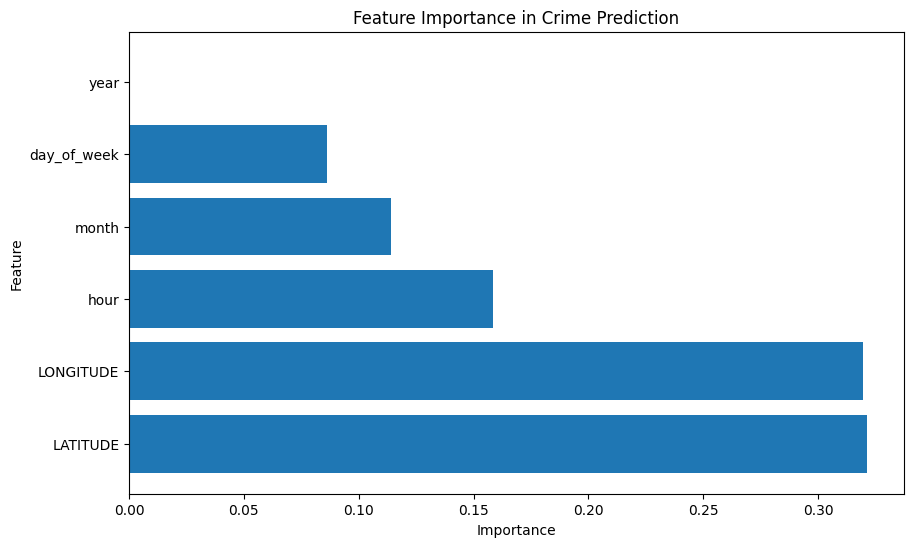

In [76]:
# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Crime Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [77]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Model Accuracy: 0.9316668930851787


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Precision
precision = precision_score(y_test, y_pred) * 100
print(f"Precision: {precision:.2f}%")

# Recall
recall = recall_score(y_test, y_pred) * 100
print(f"Recall: {recall:.2f}%")

# F1-score
f1 = f1_score(y_test, y_pred) * 100
print(f"F1-score: {f1:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


Accuracy: 93.09%
Precision: 43.75%
Recall: 2.77%
F1-score: 5.21%
Confusion matrix:
[[6838   18]
 [ 491   14]]


In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define the crimes you're interested in predicting
crimes_of_interest = ['THEFT F/AUTO', 'ROBBERY', 'MOTOR VEHICLE THEFT']

# Create a mapping for target labels
crime_mapping = {'THEFT F/AUTO': 0, 'ROBBERY': 1, 'MOTOR VEHICLE THEFT': 2}

# This should be done in a multi-class classification scenario

def predict_crime():
    # Get user input
    latitude = float(input("Enter latitude: "))
    longitude = float(input("Enter longitude: "))
    hour = int(input("Enter hour (0-23): "))
    day_of_week = int(input("Enter day of the week (0=Monday, 6=Sunday): "))
    month = int(input("Enter month (1-12): "))
    year = int(input("Enter year: "))
    
    # Create a new data point based on the user input
    new_data = pd.DataFrame({
        'LATITUDE': [latitude],
        'LONGITUDE': [longitude],
        'hour': [hour],
        'day_of_week': [day_of_week],
        'month': [month],
        'year': [year]
    })
    
    # Predict the likelihood of the three crimes
    predictions = rf.predict(new_data)
    
    # Map predictions back to crime names
    predicted_crimes = [crime for crime, label in crime_mapping.items() if label == predictions[0]]
    
    # Display the prediction results
    if len(predicted_crimes) > 0:
        print(f"Predicted crime at location ({latitude}, {longitude}) and time {hour}:00 on {day_of_week} of {month}/{year}:")
        for crime in predicted_crimes:
            print(f"High likelihood of '{crime}' occurring.")
    else:
        print("No crime predicted for this location and time.")
    
# Call the function
predict_crime()


ValueError: could not convert string to float: ''